In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from scipy.io import wavfile as wav
import pandas as pd
import os
import numpy as np
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
import catboost as cb

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint,LearningRateScheduler
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [58]:
#os.chdir(r"C:\Users\eatb6\Documents\ML\Final Project\ML2021BigProject-main\ML2021BigProject-main\Code")
file = r"classical.00006.wav"
file2 = r"metal.00013.wav"
file3 = r"country.00004.wav"
file4 = r"rock.00016.wav"
file5 = r"blues.00000.wav"

Text(0.5, 1.0, 'Waveform')

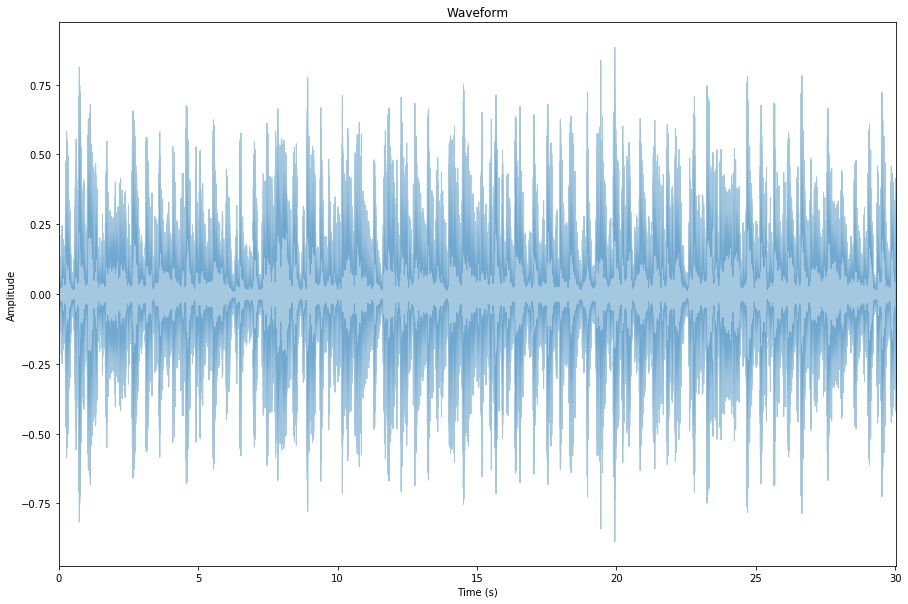

In [59]:
FIG_SIZE = (15,10)
signal, sr = librosa.load(file5, sr=22050)
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sr, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

#plt.tight_layout()
#plt.savefig('blueswav.pdf')

In [22]:
fft = np.fft.fft(signal)
spectrum = np.abs(fft)
f = np.linspace(0, sr, len(spectrum))
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

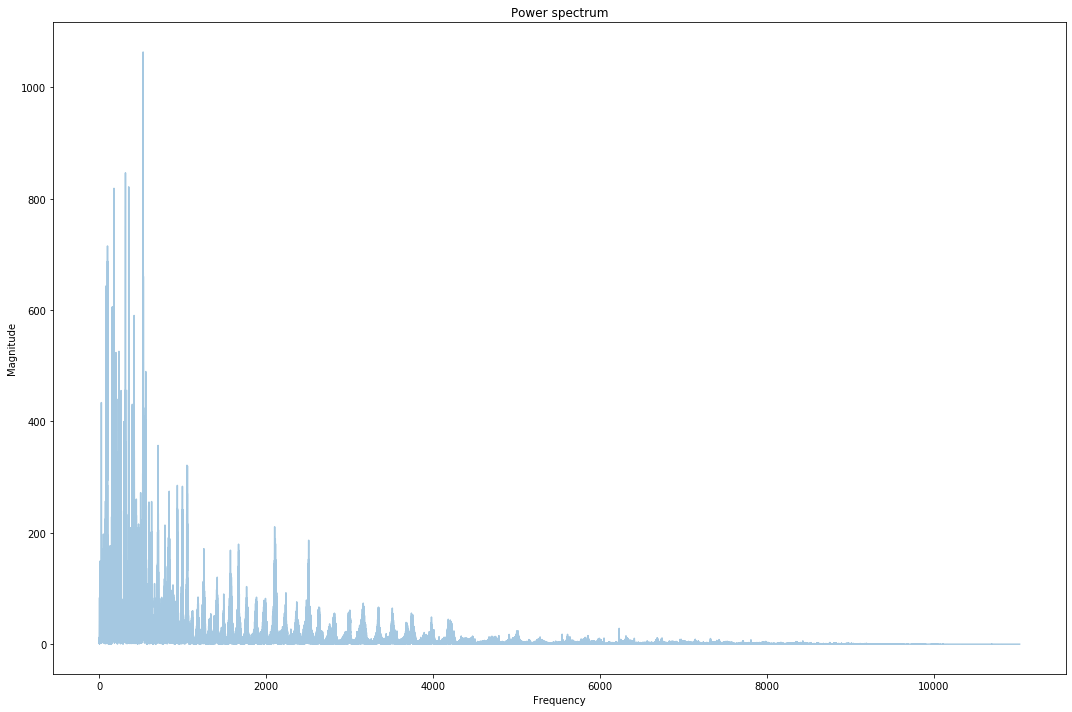

In [23]:
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")
plt.tight_layout()
#plt.savefig('bluespowerspec.pdf')

In [24]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

Text(0.5, 1.0, 'Spectrogram')

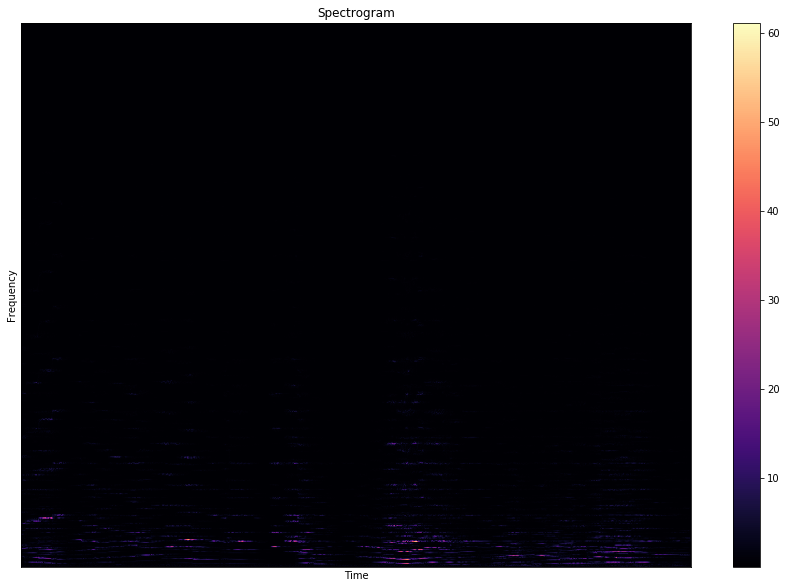

In [25]:
spectrogram = np.abs(stft)
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

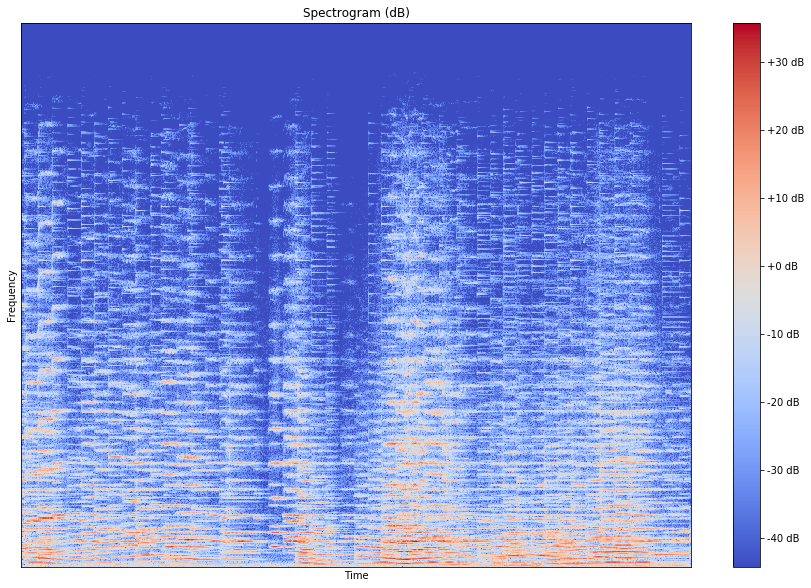

In [26]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.savefig('bluesspectrogram.pdf')

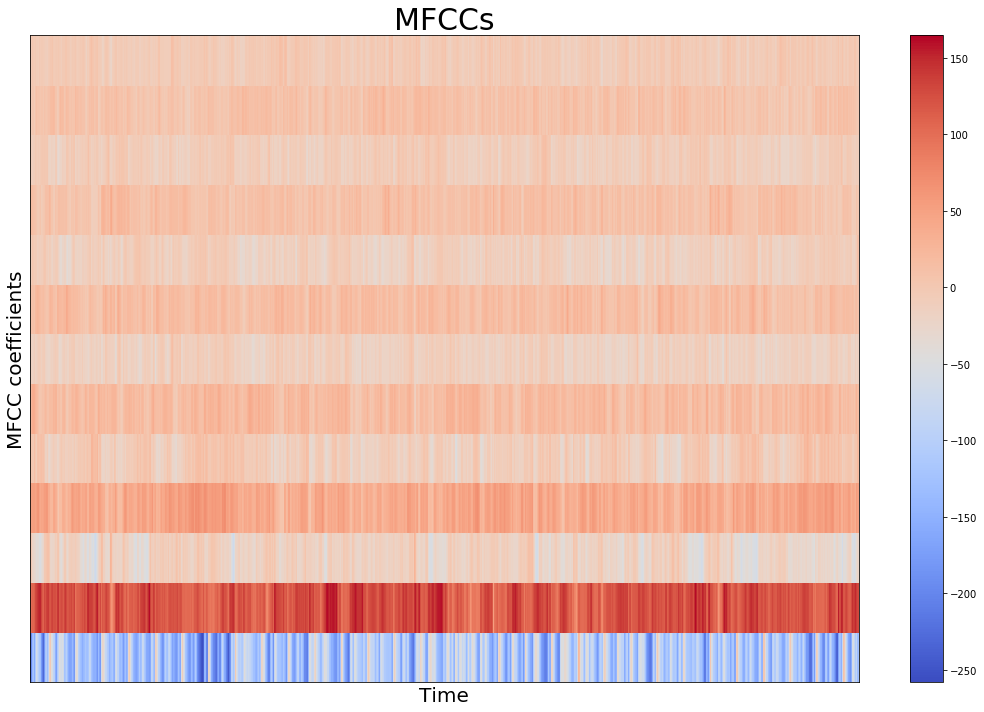

In [60]:
MFCCs = librosa.feature.mfcc(signal, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time", fontsize=20)
plt.ylabel("MFCC coefficients", fontsize=20)
plt.colorbar()
plt.title("MFCCs", fontsize=30)
plt.tight_layout()
plt.savefig('BluesMFCCs.pdf')
# show plots
plt.show()




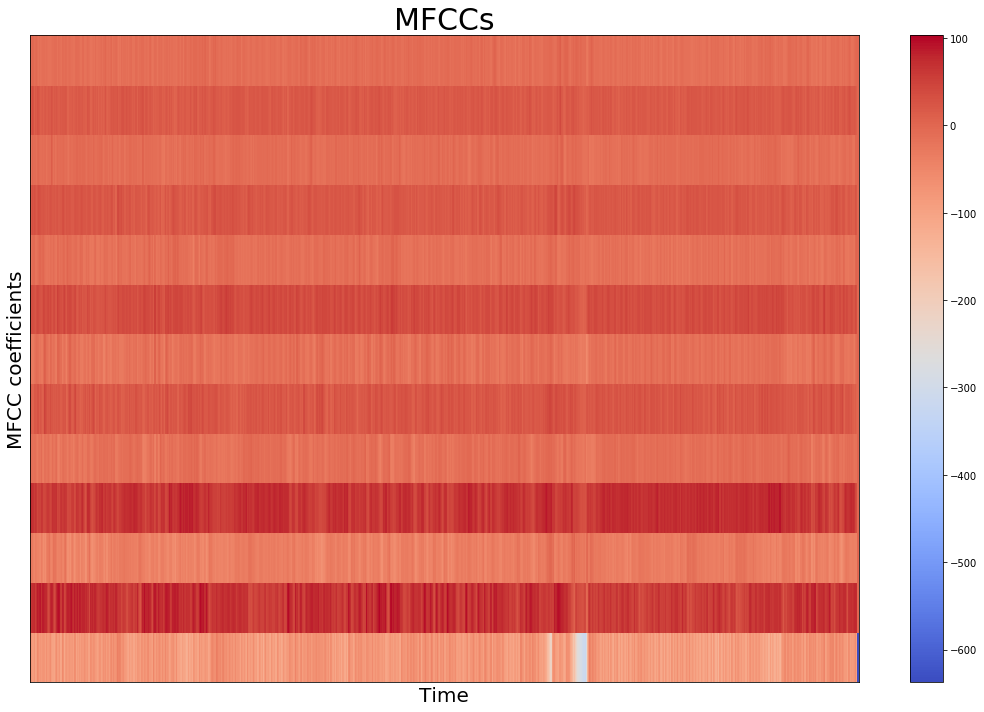

In [50]:
MFCCs = librosa.feature.mfcc(signal, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time", fontsize=20)
plt.ylabel("MFCC coefficients", fontsize=20)
plt.colorbar()
plt.title("MFCCs", fontsize=30)
plt.tight_layout()
plt.savefig('metalMFCCs.pdf')
# show plots
plt.show()

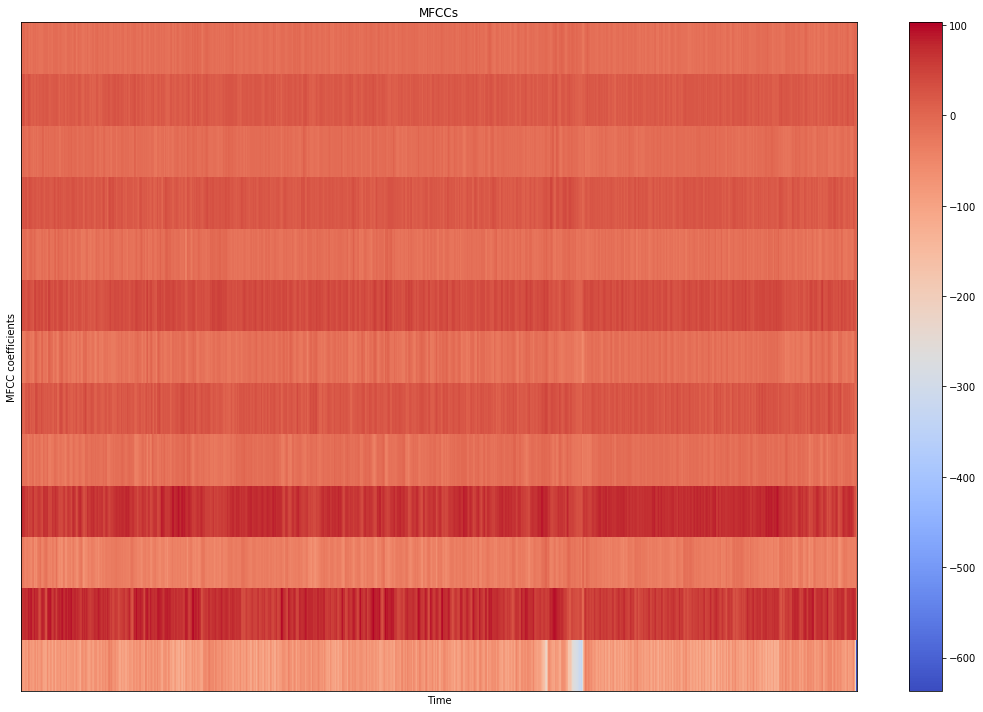

In [44]:
MFCCs = librosa.feature.mfcc(signal, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.tight_layout()
plt.savefig('MetalMFCCs.pdf')
# show plots
plt.show()